<a href="https://colab.research.google.com/github/suhyeon03/study_ML_/blob/main/_regression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.회귀

In [ ]:
# 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것이다.
# 지도학습의 두 축인 분류와 회귀의 차이는 예측값이 카테고리와 같은 이산형 클래스 값은 -> 분류, 연속형 숫자 -> 회귀
# 규제란 일반적인 선형 회귀의 과적합 문제를 해결하기 위한 회귀 계수에 페널티 값을 적용하는 것을 말한다.
# 일반 선형 회귀 - 규제를 적용 하지 않은 모델
# 릿지 - 선형회귀에 L2 규제를 추가한 모델
# 라쏘 - 선형회귀에 L1 규제를 추가한 모델
# 엘라스틱넷 - L2,L1 규제를 함계 결합한 모델
# 로지스틱 회귀 - 분류에 사용되는 선형 모델
# 최적의 회귀모델을 만든다는 것은 전체 데이터의 잔차(오류값) 합이 최소가 되는 모델을 만드는 것이다.
# 오류 값은 +나 -가 될 수 있어서 절대값을 취하거나, 오류값의 제곱을 구해서 더하느 방식을 취한다.
# RSS -> 비용함수
# 비용함수가 최소가 되는 W 파라미터를 구할 수 있을까? -> 경사하강법
# 경사하강법의 핵심은 어떻게 하면 오류가 작아지는 방향으로 W 값을 보정할 수 있을까?
# --> 편미분

##1-1. 경사하강법 파이썬 구현

In [ ]:
# Step 1 : W1,W0를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산한다.
# Step 2 : W1과 W0을 업데이트하고 다시 비용 함수의 값을 계산한다.
# Step 3 : 비용 함수가 감소하느 방향성으로 주어진 횟수만큼 Step 2를 반복하면서 W1과 W0를 계속 업데이트 한다.

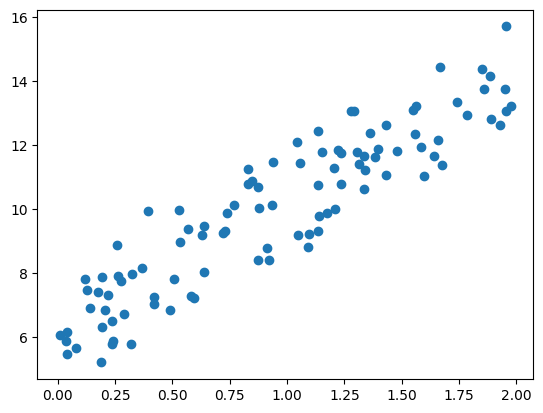

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x + 6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)


In [85]:
def get_cost(y, y_tesr):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1 값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [86]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

w1:[0:.3f]
Gradient Descent Total Cost: 0.9935


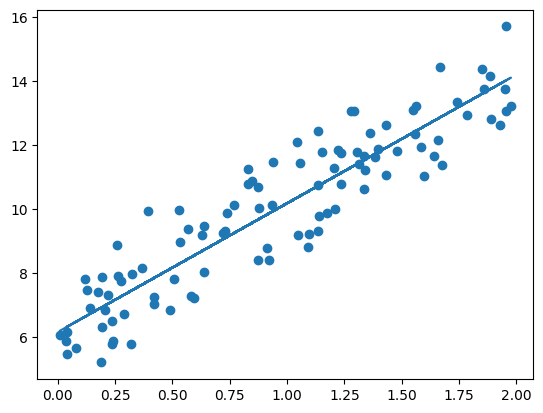

In [87]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:[0:.3f]'.format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

plt.scatter(X, y)
plt.plot(X, y_pred)

##1-2. (미니 배치) 확률적 경사하강법 파이썬 구현

In [ ]:
# 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도 보장
# 앞서 생성한 gradient_descent_steps()와 크게 다르지 않다. 다만 전체 데이터 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해
# 이를 기반으로 w1_update, w0_update를 계산하는 부분만 차이가 있다.

In [88]:
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[:batch_size]]
        sample_y = y[stochastic_random_index[:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


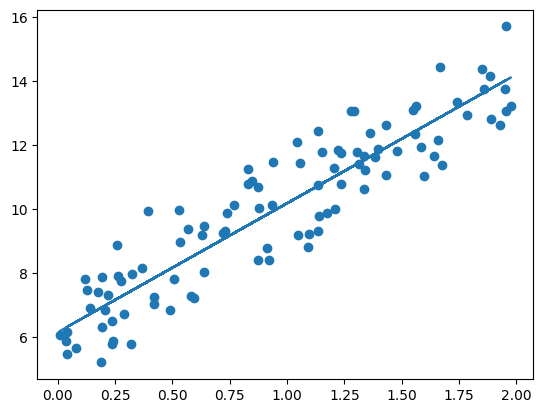

In [89]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3), "w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

plt.scatter(X, y)
plt.plot(X, y_pred)

##1-3. LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 캘리포니아 주택 데이터셋 로드
housing = fetch_california_housing()

# DataFrame 변환
housingDF = pd.DataFrame(housing.data, columns=housing.feature_names)

# target (중간 주택가격)을 'PRICE' 컬럼으로 추가
housingDF['PRICE'] = housing.target

print('California 주택 데이터셋 크기:', housingDF.shape)
housingDF.head()

California 주택 데이터셋 크기: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



* MedInc	지역의 중간 소득 (Median income in block group)
  단위: 10,000 달러 (예: 3.5 → $35,000)

* HouseAge	주택 연식 (Median house age in block group)
  해당 지역 주택들의 중간 건축 연도

* AveRooms	평균 방 개수 (Average number of rooms per household)
  1가구당 평균 방 수

* AveBedrms	평균 침실 개수 (Average number of bedrooms per household)
  1가구당 평균 침실 수

* Population	지역 인구 수 (Block group population)
  해당 지역 전체 인구 수

* AveOccup	평균 가구원 수 (Average number of household members)
  1가구당 평균 인원 수

* Latitude	위도 (Latitude)
  지역의 지리적 위도

* Longitude	경도 (Longitude)
  지역의 지리적 경도

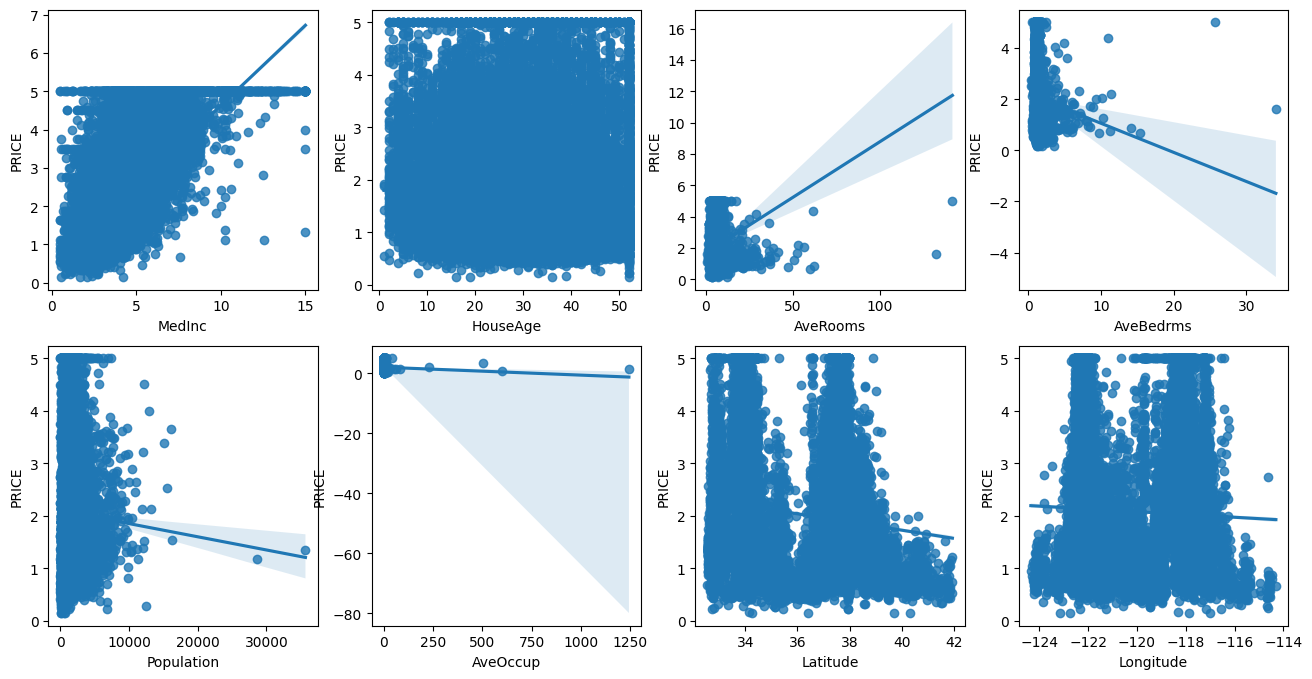

In [91]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4*2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
               'Population', 'AveOccup', 'Latitude', 'Longitude']
for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=housingDF, ax=axs[row][col])

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = housingDF['PRICE']
X_data = housingDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.543, RMSE : 0.737
Variance score : 0.595


In [93]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: -37.239053052941664
회귀 계수값: [ 0.4  0.  -0.1  0.6 -0.  -0.  -0.4 -0.4]


In [94]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

,0
AveBedrms,0.6
MedInc,0.4
HouseAge,0.0
Population,-0.0
AveOccup,-0.0
AveRooms,-0.1
Latitude,-0.4
Longitude,-0.4


In [95]:
from sklearn.model_selection import cross_val_score

y_target = housingDF['PRICE']
X_target = housingDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5 )
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score("scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-0.48 -0.62 -0.65 -0.54 -0.49]
5 folds 의 개별 RMSE scores :  [0.7  0.79 0.8  0.74 0.7 ]
5 folds 의 평균 RMSE : 0.746 


#2.다항회귀와 오버피팅/언더피팅 이해

In [96]:
# 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항회귀라고 한다.
# 다항 회귀를 비선형 회귀로 혼동하기 쉽지만, 다항회귀는 선형회귀라는 점이다.
# 선형/비선형 회귀로 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관하다.
# 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않는다. 대신 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 선형모델에
# 적용시키는 방법을 사용해 구현한다.

### 2-1. Polynomial Regression 이해


In [97]:
# PolynomialFeatures 클래스로 다항식 변환

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환된 단항식 생성, [[0,1], [2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [98]:
# 3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성. 즉 회귀식은 결정값 y = 1+ 2x_1 + 3x_1^2 + 4x_2^3

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 단항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 단항식 결정값: 
 [  5 125]


In [99]:
# 3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습
from sklearn.linear_model import LinearRegression
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape: ', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape:  (10,)


In [100]:
# 사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습
# 사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합해줍니다.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 2-2. 다항 회귀를 이용한 보스턴 주택가격 예측

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

# boston 데이타셋 로드
housing = fetch_california_housing()

# boston 데이타셋 DataFrame 변환
housingDF = pd.DataFrame(housing.data, columns=housing.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함.
housingDF['PRICE'] = housing.target
print('Boston 데이타셋 크기 :',housingDF.shape)

y_target = housingDF['PRICE']
X_data = housingDF.drop(['PRICE'],axis=1,inplace=False)


X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합.
p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Boston 데이타셋 크기 : (20640, 9)
MSE : 81.059 , RMSE : 9.003
Variance score : -59.454


In [102]:
X_train_poly= PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((14448, 44), (14448, 8))

##2-3. Polynomial Regression을 이용한 Underfitting, Overfitting 이해


Degree 1 회귀계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.4077289625098685 입니다.

Degree 4 회귀계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987232064 입니다.

Degree 15 회귀계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56423894 입니다.


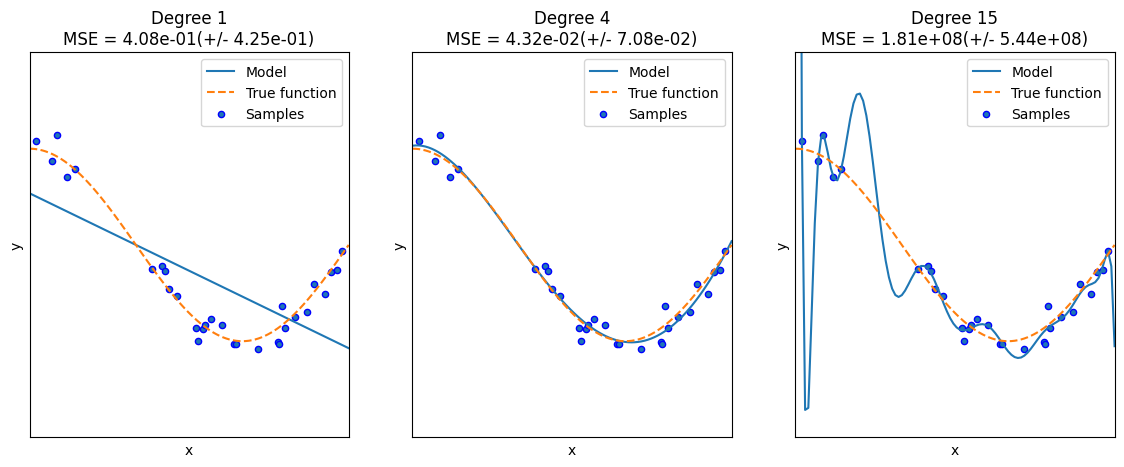

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_func(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_func(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test.reshape(-1, 1)), label="Model")
    # 실제값 곡선
    plt.plot(X_test, true_func(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")

    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -1*np.mean(scores), np.std(scores)))
plt.show()



In [ ]:
# 결국 좋은 예측 모델은 degree 1과 같이 학습 데이터의 패턴을 지나치게 단순화한 과소적합 모델도 아니고 degree 15와 같이
# 모든 학습 데이터의 패턴을 하나하나 감안한 지나치게 복잡한 과적합 모델도 아닌 학습데이터의 패천을 잘 반영하면서도 복잡하지않은
# 균형잡힌 모델을 의미한다.

## 2-4. 편향-분산 트레이드오프(Bias-Variance Trade off)

In [104]:
# degree 1과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향이 있다. -> 고편향성
# degree 15와 같은 모델은 학습데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가지게 됨 -> 고분산성
# 일반적으로 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향이 있다.
# 편향이 너무 높으면 전체 오류가 높다. 편향을 점점 낮추면 동시에 분산이 높아지고 전체오류도 낮아진다.
# 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 '골드락스' 지점을 통과하면서 분산을 지속적으로 높이면 전체 오류값이 오히려 증가하면서
# 예측성능이 다시 저하된다.

#3.규제선형모델

In [ ]:
# 이전까지 선형모델의 비용함수는 RSS를 최소화하는, 즉 실제 값과 예측 값의 차이를 최소화하는 것만 고려했다.
# 그러다보니 학습데이터에 지나치게 맞추게 되고, 회귀계수가 쉽게 커졌다. 이러면 변동성이 오히려 심해져 테스트 데이터세트에서는 예측 성능이
# 저하되기 쉽다.
# 최적모델을 위한 cost함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어
# alpha는 학습데이터 세트 적합 정도와 회귀계수 값의 크기 제어를 수행하는 튜닝 파라미터이다.
# 즉, alpha 값을 크게 하면 비용함수는 회귀계수 w값을 작게 해 과적합을 개선할 수 있으며
# alpha 값을 작게 하면 회귀계수 w의 값이 커져도 어느정도 상쇄가 가능하므로 학습데이터 적합을 더 개선할 수 있다.
# 비용함수에 alpha 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제(Regularization)라고 부른다.
# L2규제를 적용한 회귀를 릿지회귀라고한다. L2규제는 위에서 설명한 바와 같이 w의 제곱에 대해 패널티를 부여하는 방식을 말한다.
# L1규제를 적용한 회귀를 라쏘회귀라고한다. L1규제는 W의 절대값에 대해 패널티를 부여한다. L1규제를 적용하면 영향력이 크지 않은 회귀 계수 값을
# 0으로 반환한다.

##3-1. 릿지회귀

In [ ]:
# alpha 값을 이용해 회귀계수의 크기를 조절
# Ridge는 특히 다중공선성(피처 간 상관관계가 클 때)을 해결하는데 효과적.
# 선형회귀 -> 규제선형 -> 릿지,랏쏘,엘라스넷

In [105]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 릿지 회귀 수행.
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))


5 folds 의 개별 Negative MSE scores:  [-0.484 -0.623 -0.646 -0.544 -0.494]
5 folds 의 개별 RMSE scores :  [0.695 0.789 0.804 0.737 0.703]
5 folds 의 평균 RMSE : 0.746


In [106]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alpha list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    # cross_val_score를 이용해 5 폴드의 평균 rmse를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 0.746
alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.746
alpha 1 일 때 5 folds 의 평균 RMSE : 0.746
alpha 10 일 때 5 folds 의 평균 RMSE : 0.746
alpha 100 일 때 5 folds 의 평균 RMSE : 0.746


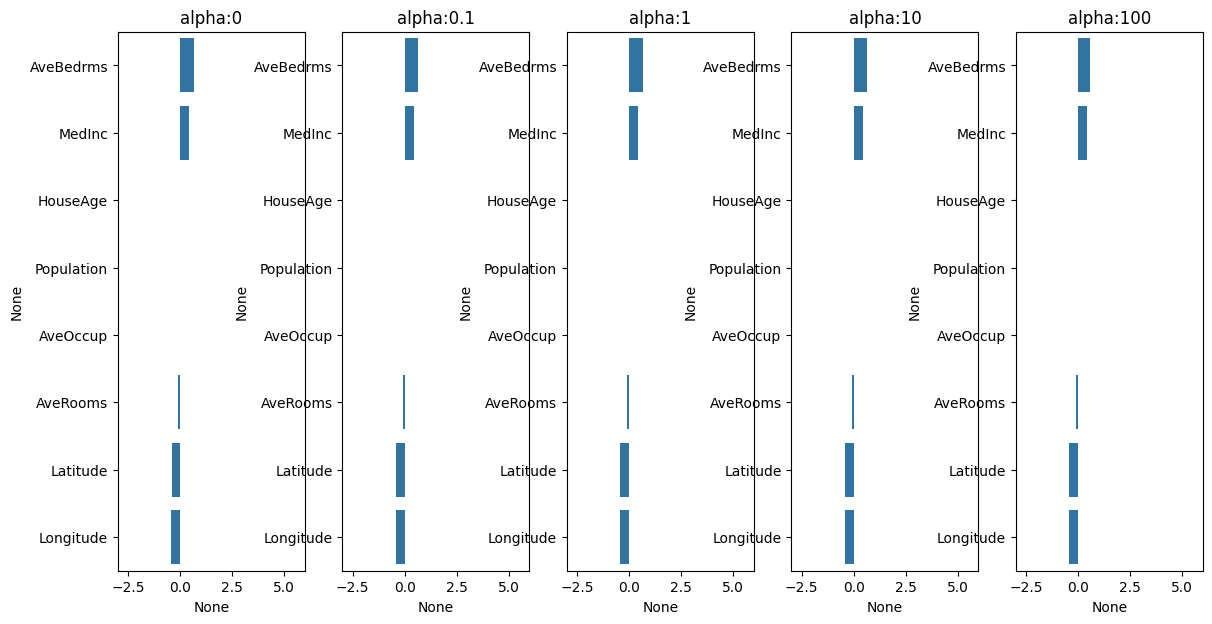

In [107]:
# alpha 값의 변화에 따른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(14, 7), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alpha 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 저장
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()




In [108]:
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

# 계속 작아지기는 하나 회귀계수를 0으로 만들지는 않는다.

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
AveBedrms,0.645066,0.644965,0.644062,0.635174,0.558249
MedInc,0.436693,0.436683,0.436594,0.435719,0.428210
HouseAge,0.009436,0.009436,0.009437,0.009452,0.009592
Population,-0.000004,-0.000004,-0.000004,-0.000004,-0.000003
AveOccup,-0.003787,-0.003787,-0.003786,-0.003785,-0.003773
AveRooms,-0.107322,-0.107303,-0.107133,-0.105456,-0.091012
Latitude,-0.421314,-0.421313,-0.421299,-0.421156,-0.419061
Longitude,-0.434514,-0.434511,-0.434485,-0.434217,-0.430993


##3-2. 라쏘회귀

In [ ]:
# L2 규제가 회귀 계수의 크기를 감소시키는데 반해, L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거한다.
# 이러한 측면에서 L1 규제는 적절한 피처만 회귀에 포함시키는 피처 선택의 특성을 가지고 있다.

In [109]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df
# end of get_linear_regre_eval

In [110]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 0.784 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.813 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.873 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1.000 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 1.171 


In [111]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
MedInc,0.387057,0.390583,0.288855,0.145469,0.000000
HouseAge,0.013391,0.015082,0.012031,0.005815,0.000000
Population,0.000010,0.000018,0.000012,-0.000006,-0.000023
AveRooms,-0.000000,-0.000000,0.000000,0.000000,0.000000
AveBedrms,0.000000,0.000000,-0.000000,-0.000000,-0.000000
AveOccup,-0.003409,-0.003323,-0.000000,-0.000000,-0.000000
Longitude,-0.204689,-0.099225,-0.000000,-0.000000,-0.000000
Latitude,-0.212806,-0.114214,-0.000000,-0.000000,-0.000000


##3-3. 엘라스틱넷 회귀

In [ ]:
# L1,L2 규제를 결합한 회귀이다.
# 엘라스틱넷은 라쏘회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀 계수를
# 0으로 만드는 성향이 강하다.
# l1_ratio가 0이면 a가 0 -> L2규제
# l1_ratio가 1이면 b가 0 -> L1규제

In [112]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 0.773 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.788 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.855 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.931 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 1.171 


In [113]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
MedInc,0.384500,0.385980,0.318532,0.213455,0.000000
HouseAge,0.012534,0.013697,0.013662,0.009156,0.000000
Population,0.000007,0.000012,0.000018,0.000003,-0.000023
AveRooms,0.000000,-0.000000,0.000000,0.000000,0.000000
AveBedrms,0.000000,0.000000,-0.000000,-0.000000,-0.000000
AveOccup,-0.003502,-0.003437,-0.000837,-0.000000,-0.000000
Longitude,-0.259559,-0.185737,-0.000000,-0.000000,-0.000000
Latitude,-0.264115,-0.195109,-0.000000,-0.000000,-0.000000


##3-4.선형 회귀 모델을 위한 데이터 변환

In [ ]:
# 선형회귀모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적이다.
# 그렇지만 스케일링/정규화 작업을 한다고해서 무조건 예측성능이 향상되는 것은 아니다.
# 일반적을 중요 피처들이나 타켓값의 분포도가 심하게 왜곡됬을 경우에 이러한 변환 작업을 수행한다.

In [ ]:
# 타겟값 변환
# 피처값 변환 - 스케일링
# 피처값 변환 - 다항 특성 변환
# 피처값 변환 - 로그 변환

In [114]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다항식 특성을 추가할 때 적용. p_degree는 2 이상 부여하지 않음.
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
        scaled_data = np.where(np.isfinite(scaled_data), scaled_data, 0)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

    return scaled_data
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RSME 추출.
alphas = [0.1,1,10,100]

# 5개 방식으로 변환. 먼저 원본 그대로, 표준정규 분포, 표준정규 분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods=[(None, None), ('Standard', None), ('Standard', 2),
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled,
                        y_target_n=y_target, verbose=False, return_coeff=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.746 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.746 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.746 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.746 

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.746 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.746 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.746 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.746 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 3.323 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 2.850 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 1.314 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.719 

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.745 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.748 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.816 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.726 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.742 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.755 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.789 

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 폴

#4.로지스틱회귀

In [ ]:
# 선형회귀방식을 분류에 적용한 알고리즘이다. 로지스틱 회귀는 분류에 사용된다.
# 회귀가 선형인가 비선형인가는 독립변수가 아닌 가중치 변수가 선형인지 아닌지를 따르낟.
# 로지스틱 회귀가 선형회귀와 다른점은 학습을 통해 선형회귀 함수의 회귀 최적선을 찾는 것이 아니라 시그모이드 함수 최적선을 찾고
# 이 시그모이드 함수의 반환값을 확률로 간주해 확률에 따라 분류를 결정한다는 것이다.
# 가볍고, 빠르고, 이진분류 예측성능이 높다. 희소한 데이터 세트 분류에서 성능이 좋아서 텍스트 분류에 자주 사용된다.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)


In [117]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행
# solver 인자값을 생성자로 입력하지 않으면 solver='lbfgs'
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_aur 측정
print('accuracy: {0:.3f}, roc_auc: {1:.3f}'.format(
    accuracy_score(y_test, lr_preds), roc_auc_score(y_test, lr_preds)))


accuracy: 0.977, roc_auc: 0.972


In [118]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

# 여러개의 solver값 별로 LogisticRegression 학습 후 성능 평가
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)

    # accuracy와 roc_auc 측정
    print('solver:{0}, accuracy: {1:.3f}, roc_auc{2:.3f}'.format(solver, accuracy_score(y_test, lr_preds), roc_auc_score(y_test, lr_preds)))

solver:lbfgs, accuracy: 0.977, roc_auc0.972
solver:liblinear, accuracy: 0.982, roc_auc0.979
solver:newton-cg, accuracy: 0.977, roc_auc0.972
solver:sag, accuracy: 0.982, roc_auc0.979
solver:saga, accuracy: 0.982, roc_auc0.979


In [119]:
from sklearn.model_selection import GridSearchCV

params={'solver':['liblinear', 'lbfgs'],
        'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


#5.회귀트리

In [ ]:
# 회귀함수를 기반으로 하지않고 결정트리와 같이 트리를 기반으로 하는 회귀 방식이다.
# 회귀 트리는 앞 장의 분류에서 언급했던 분류 트리와 크게 다르지 않다. 다만 리프 노드에서 예측 결정 값을 만드는 과정에 차이가 있는데
# 분류 트리가 특정 클래스 레이블을 결정하는 것과는 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산한다.

In [120]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거

# boston 데이타셋 로드
housing = fetch_california_housing()

# boston 데이타셋 DataFrame 변환
housingDF = pd.DataFrame(housing.data, columns=housing.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함.
housingDF['PRICE'] = housing.target
print('Boston 데이타셋 크기 :',housingDF.shape)

y_target = housingDF['PRICE']
X_data = housingDF.drop(['PRICE'],axis=1,inplace=False)


rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

Boston 데이타셋 크기 : (20640, 9)
 5 교차 검증의 개별 Negative MSE scores:  [-0.52 -0.34 -0.37 -0.44 -0.46]
 5 교차 검증의 개별 RMSE scores :  [0.72 0.59 0.61 0.66 0.68]
 5 교차 검증의 평균 RMSE : 0.651 


In [121]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [123]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 0.809 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 0.651 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 0.627 
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 0.677 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.164930
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.034871
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead 

<Axes: xlabel='None', ylabel='None'>

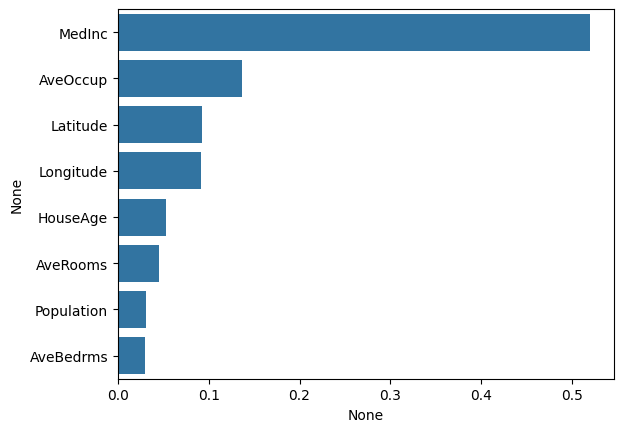

In [124]:
# 회귀 트리 regressor 클래스는 선형 회귀와 다른 처리 방식이므로 회귀 계수를 제공하는 coef_ 속성이 없다
# 대신 feature_importances_를 이용해 피처별 중요도를 알 수 있다.

import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

(100, 2)


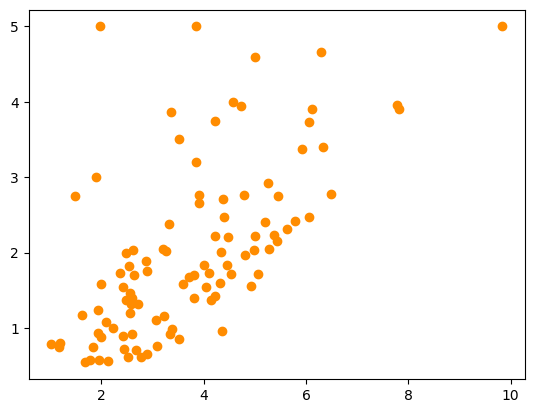

In [133]:
# Regressor가 어떻게 예측값을 판단하는지 선형 회귀와 비교해 시각화.

import matplotlib.pyplot as plt
%matplotlib inline

housingDF_sample = housingDF[['MedInc','PRICE']]
housingDF_sample = housingDF_sample.sample(n=100,random_state=0)
print(housingDF_sample.shape)
plt.figure()
plt.scatter(housingDF_sample.MedInc , housingDF_sample.PRICE,c="darkorange")

In [134]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = housingDF_sample['MedInc'].values.reshape(-1,1)
y_target = housingDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행.
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

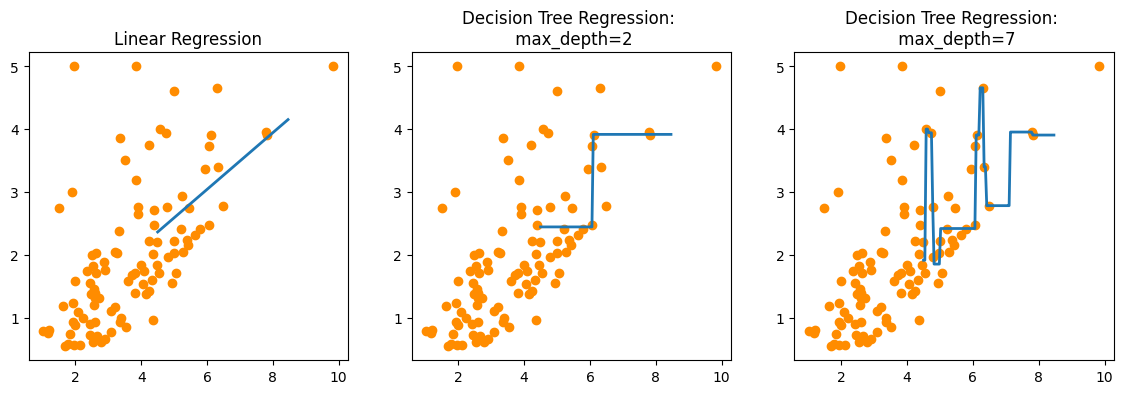

In [137]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(housingDF_sample.MedInc, housingDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(housingDF_sample.MedInc, housingDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:2", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(housingDF_sample.MedInc, housingDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)

#6.회귀 실습 - 자전거 대여 수요 예측

### 데이터 클렌징 및 가공과 데이터 시각화

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

bike_df = pd.read_csv('bike_train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# 문자열을 datatime 타입으로 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 시, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [ ]:
# casual, registered의 합이 count이므로 필요 X, 오히려 상관도가 높아 예측이 저하될 우려가 있음
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

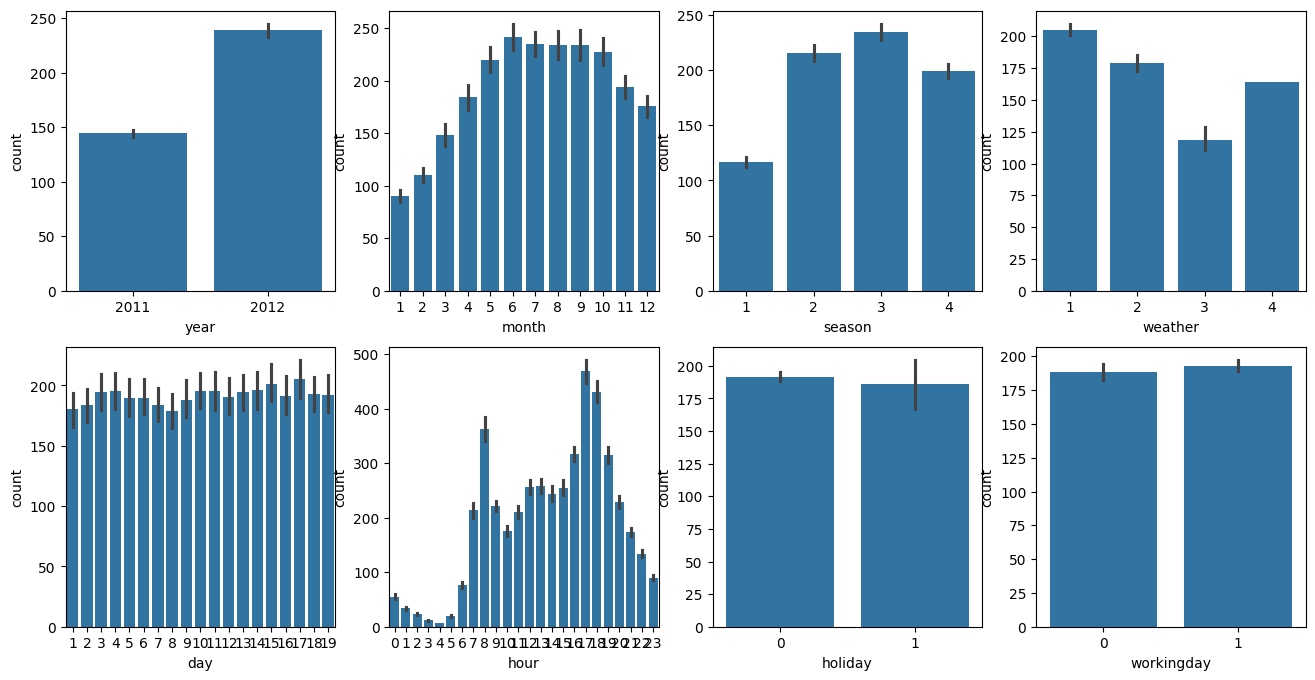

In [ ]:
fig, axs = plt.subplots(figsize=(16, 8), ncols = 4, nrows = 2 )
cat_features = ['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']
# cat_feature에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i % 4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p()을 이용해 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error()를 이용해 RMSE 계산
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

# MSE, RMSE, RMSLEfmf 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    # MAE는 사이킷런의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [ ]:
# 다음과 같은 rmsle 구현은 오버플로나 언더플로 오류를 발생하기 쉽다.
# def rmsle(y, pred):
#    msle = mean_squared_log_error(y, pred)
#    rmsle = np.sqrt(mse)
#    return rmsle
# 따라서 log()보다는 log1p()를 이용하는데, log1p()의 경우는 1+log()값으로 log 변환값에 1을 더하므로
# 이런문제를 해결해준다. 그리고 log1p()로 변환된 값은 다시 넘파이의 expm1()함수로 쉽게 원래의 스케일로 복원될 수 있다.

### 로그변환, 피처 인코딩과 모델 학습/예측/평가

In [ ]:
# 회귀모델을 적용하기 전에 데이터세트에 대해 먼저 처리해야할 사항이 있다. 결과값이 정규 분포로 돼 있는지 확인하는 것과
# 카테고리형 회귀 모델의 경우 원-핫 인코딩으로 피처를 인코딩하는 것이다.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

# 실제 Target 데이터 값인 대여 회수 (Count)를 감안하면 예측 오류로서는 비교적 큰 값이다.
# 실제 값과 예측값이 어느 정도 차이가 나는지 DataFrame의 칼럼으로 만들어서 오류 값이 가장 큰 순으로 5개만 확인해 보자.

RMSLE : 1.165, RMSE : 140.900, MAE : 105.924


In [ ]:
def get_top_error_data(y_test, pred, n_tops=5):
    # DataFrame의 칼럼으로 실제 대여 횟수(count)와 예측값을 서로 비교할 수 있도록 생성.
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])

    # 예측값과 실제 값이 가장 큰 데이터 순으로 출력.
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
966          884            327.0  557.0
3151         798            241.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<Axes: >

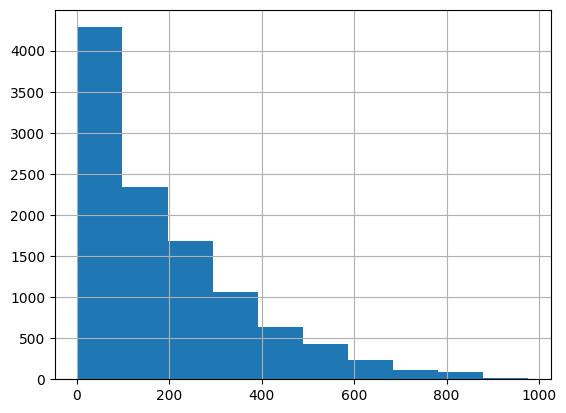

In [ ]:
# 회귀에서 이렇게 큰 예측 오류가 발생할 경우 가장 먼저 살펴볼 것은 Target 값의 분포가 왜곡된 형태를 이루고 있는지 확인하는 것이다.
# Target 값의 분포는 정규 분포 형태가 좋다.
y_target.hist()

<Axes: >

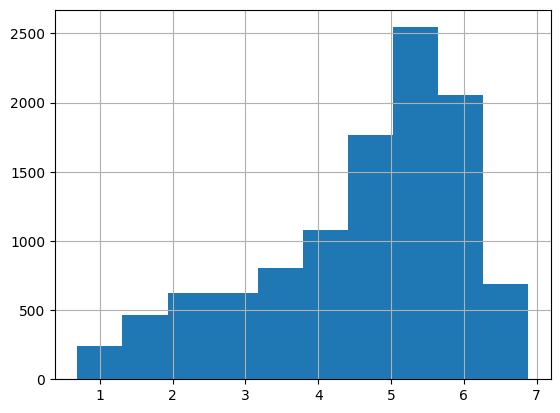

In [ ]:
# 이렇게 왜곡된 값을 정규 분포 형태로 바꾸는 가장 일반적인 방법은 로그를 적용해 변환하는 것이다.
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [ ]:
# 타깃 칼럼인 count() 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 세트의 Target 값은 로그 변환됐으므로 다시 expm1을 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)

# 예측값 역시 로그 변환된 타깃 기반으로 학습돼 예측됐으므로 다시 expm1로 스케일 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)



RMSLE : 1.017, RMSE : 162.594, MAE : 109.286


<Axes: ylabel='None'>

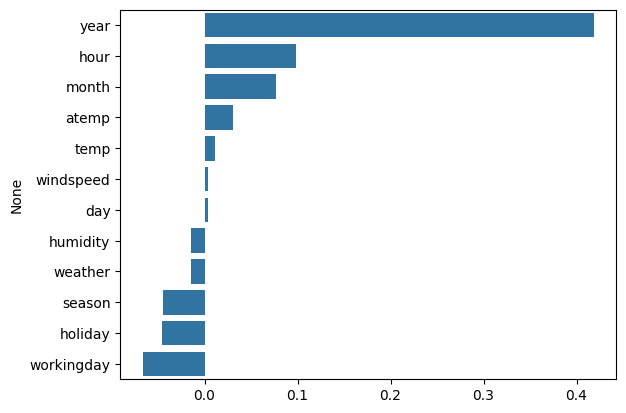

In [ ]:
# RMSLE 오류는 줄어들었지만, RMSE는 오히려 더 늘었다.
# 이번에는 개별피처들의 인코딩을 적용해 보자.

coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [ ]:
# 각 피처들의 회귀 계수 영향도가 상대적으로 높다. 하지만 year, month같은 피처들은 개별 숫자값의 크기가
# 의미있는 것은 아니다. 이들 모두 카테고리형 피처이다.
# 사이킷런은 카테고리만을 위한 데이터 타입이 없으며, 모두 숫자로 변환해야한다. -> 원-핫 인코딩

# 'year','month','day','hour'등의 피처들은 One Hot Encoding
X_feature_ohe = pd.get_dummies(X_features, columns=['year','month','hour','holiday','workingday','season','weather'])


In [ ]:
# 원-핫 인코딩이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할.
X_train, X_test, y_train, y_test = train_test_split(X_feature_ohe, y_target_log, test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 세트를 입력하면 성능 평가 수치를 반환.
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
  # end of function get_model_predict
# 모델별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE : 0.142, RMSE : 0.610, MAE : 0.463
### Ridge ###
RMSLE : 0.143, RMSE : 0.609, MAE : 0.464
### Lasso ###
RMSLE : 0.213, RMSE : 0.959, MAE : 0.774


<Axes: ylabel='None'>

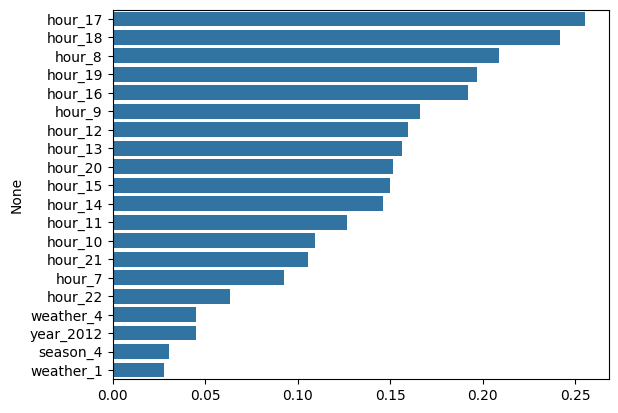

In [ ]:
coef = pd.Series(lr_reg.coef_, index=X_feature_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE : 0.093, RMSE : 0.356, MAE : 0.246
### GradientBoostingRegressor ###
RMSLE : 0.089, RMSE : 0.346, MAE : 0.251
### XGBRegressor ###
RMSLE : 0.092, RMSE : 0.351, MAE : 0.248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 54
[LightGBM] [Info] Start training from score 1.677523
### LGBMRegressor ###
RMSLE : 0.087, RMSE : 0.330, MAE : 0.232


#7.회귀실습 - 캐글 주택 가격: 고급 회귀 기법

###데이터 사전처리

In [139]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib

house_df_org = pd.read_csv('house_price.csv')
house_df = house_df_org.copy()
house_df.head(3)

Using matplotlib backend: agg


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [140]:
print('데이터 세트의 shape:', house_df.shape)
print('\n전체 피처의 type\n', house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 값이 있는 피처의 type\n', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 shape: (1460, 81)

전체 피처의 type
 object     43
int64      35
float64     3
Name: count, dtype: int64

Null 값이 있는 피처의 type
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [141]:
plt.title('Orange Sale Price Histogram')
plt.xticks(rotation=45)
sns.distplot(house_df['SalePrice'], kde=True)
plt.show()

In [142]:
# 정규분포형태로 변환
plt.title('Orange Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

In [143]:
# SalePrice 로그변환 후 DataFrame에 반영
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null이 너무 많은 칼럼과 불필요한 칼럼 삭제
house_df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True, errors='ignore')

# 드롭하지 않은 숫자형 Null 칼럼은 평균값으로 대체
#house_df.fillna(house_df.mean(), inplace=True)
house_df.fillna(house_df.select_dtypes(include=['number']).mean(), inplace=True)

# Null 값이 있는 피처링과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum()>0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [144]:
# 이제 문자형 피처를 제외하고는 Null값이 없다. 문자형 피처는 모두 원-핫 인코딩으로 변환한다.
# get_dummies()는 자동으로 문자열 피처를 원-핫 인코딩 변환하면서 Null 값은 모든 인코딩 값이 0으로 변환되는 방식으로 대체해주므로 별도의 Null 값을
# 대체하는 로직이 필요 없다.
print('get_dummies() 수행 전 데이터 Shape : ', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape : ', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type:\n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape :  (1460, 75)
get_dummies() 수행 후 데이터 Shape :  (1460, 270)
## Null 피처의 Type:
 Series([], dtype: object)


### 선형 회귀 모델 학습/예측/평가

In [8]:
# RMSLE(실제 값과 예측값의 오류를 로그 변환한 뒤 RMSE를 적용)
# 그런데 이미 타깃값인 SalePrice가 로그 변환되었다. 예측값 역시 로그 변환된 SalePrice 값을 기반으로 예측하므로
# 원본 SalePrice 예측값의 로그 변환 값이다.
# 바로 RMSE만 적용하면 RMSLE로 평가가 된다.

In [145]:
# 단일 모델의 RMSE 값
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE : ', np.round(rmse, 3))
    return rmse
# 여러 모델의 RMSE 값
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop(['SalePrice'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE :  0.132
Ridge 로그 변환된 RMSE :  0.127
Lasso 로그 변환된 RMSE :  0.176


[np.float64(0.13183184688250857),
 np.float64(0.1274058283626616),
 np.float64(0.17628250556471403)]

In [147]:
# 먼저 피처별 회귀 계수를 시각화해서 모델별로 어떠한 피처의 회귀 계수로 구성되는지 확인.
# 피처가 많으니 상위 10개, 하위 10개의 피처명과 그 회귀 계수 값을 가지는 판다스 Series 객체를 반환하는 함수를 만든다.

def get_top_bottom_coef(model, n=10):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 칼럼명.
    coef = pd.Series(model.coef_, index=X_features.columns)

    # + 상위 10개, -하위 10개의 회귀 계수를 추출해 반환.
    coef_higt = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_higt, coef_low

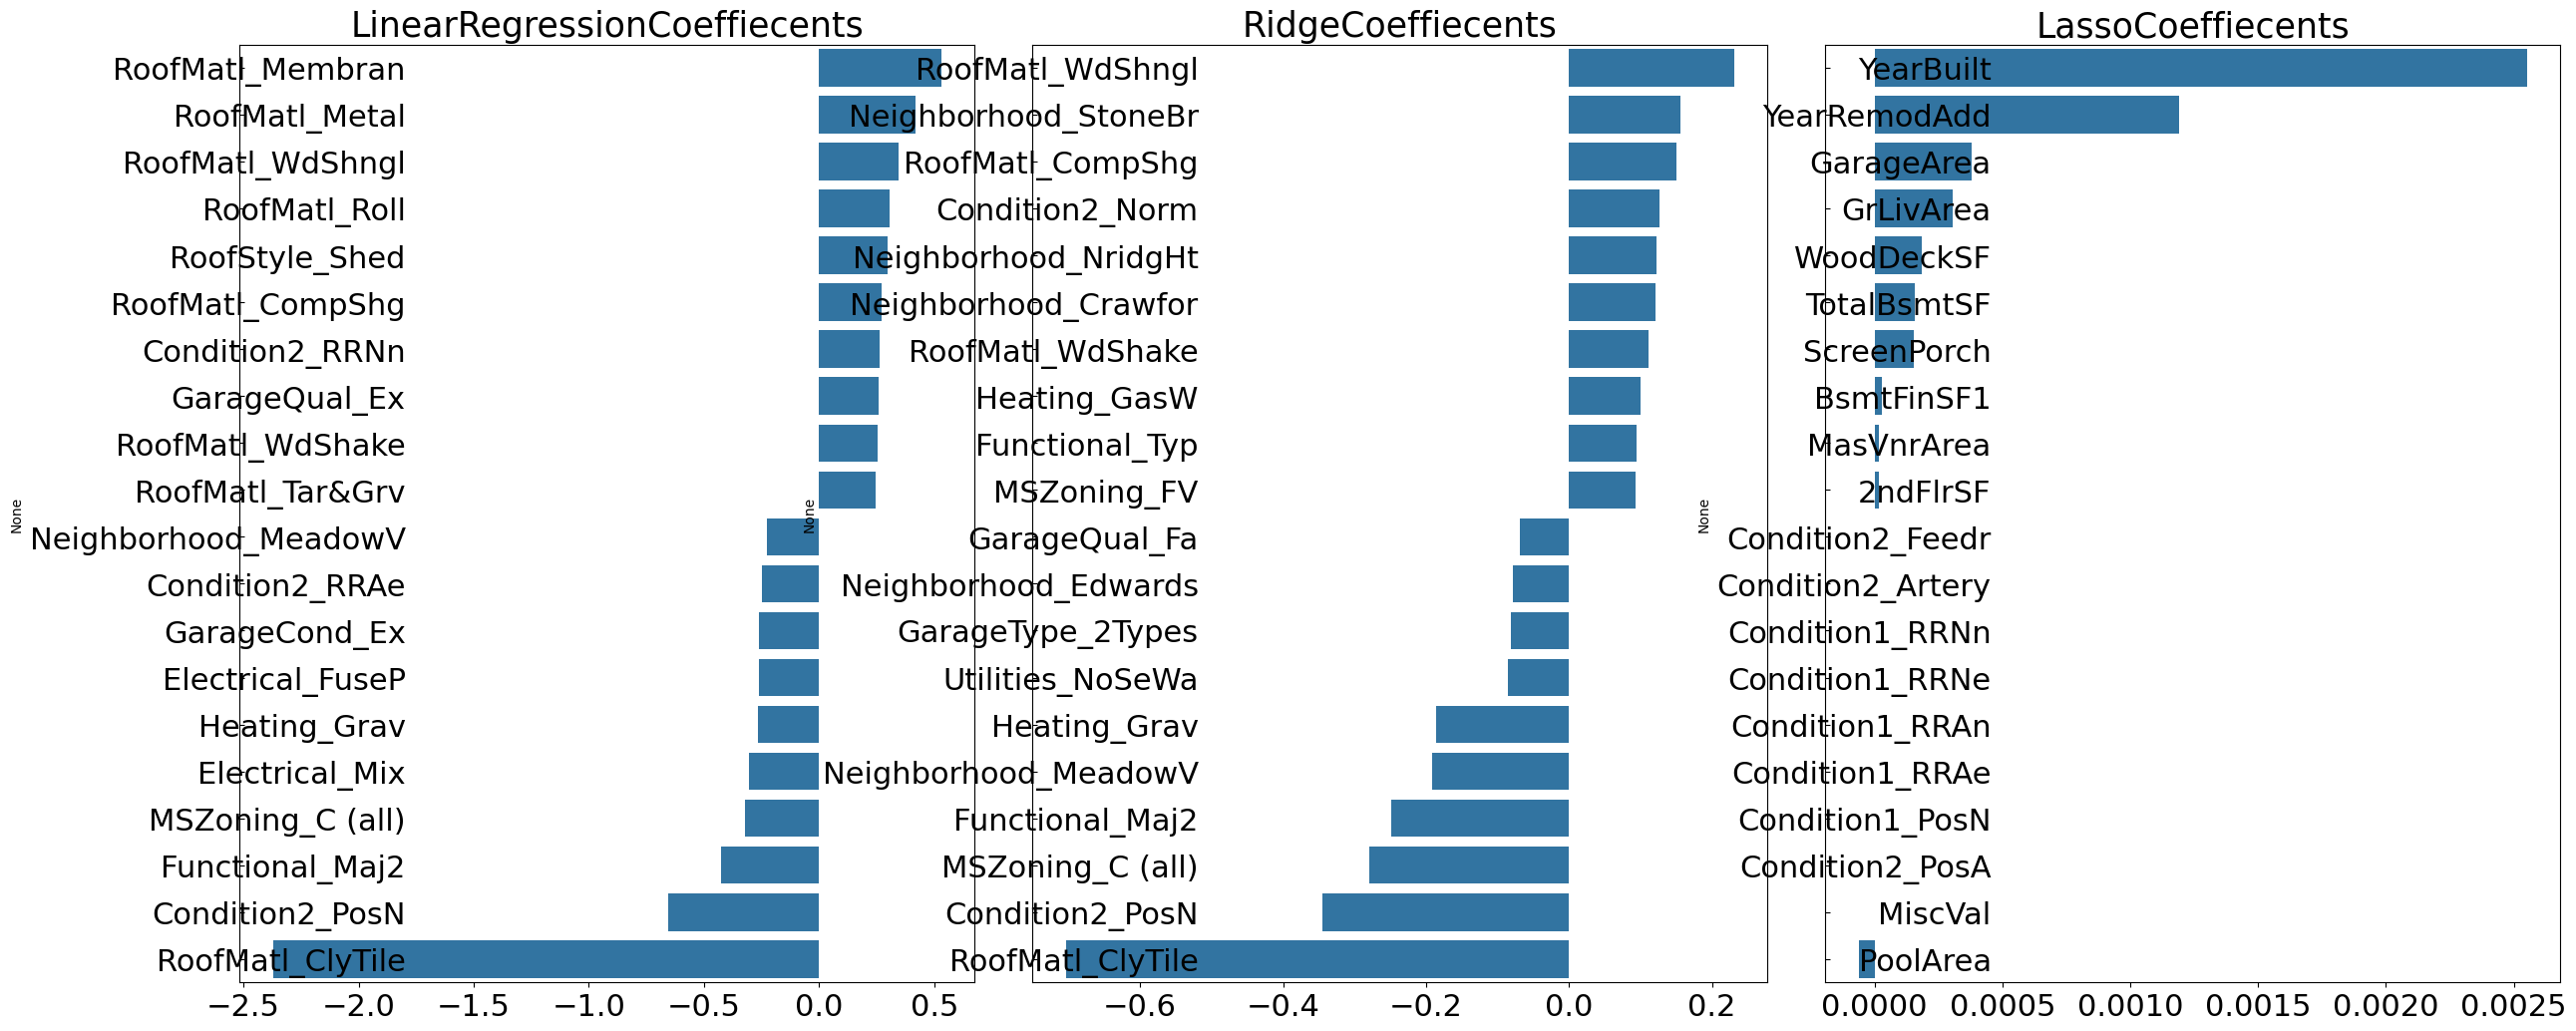

In [150]:
def visualize_coefficient(models):
    # 3개의 회귀 모델의 시각화를 위해 3개의 칼럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    # 입력 인자로 받은 list 객체인 models에서 차례대로 model을 추출해 회귀 계수 시각화.
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        # ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__+'Coeffiecents', size=25)
        axs[i_num].tick_params(axis='y', direction='in', pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [ ]:
# 라쏘는 전체적으로 회귀 계수 값이 작고, 그중에 yearbuilt가 가장 크고 다른 피처의 회귀 계수는 너무 작다.
# 라쏘의 경우 다른 두 개의 모델과 다른 회귀 계수 형태를 보이고 있다. 혹시 학습데이터의 데이터 분할에 문제가 있어서 그런지, 이번에는 학습과 테스트 데이터세트를
# 분할하지 않고 X_features와 y_target을 5개의 교차검증폴드세트로 분할해 평균 RMSE를 측정한다.

In [151]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):

    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score()수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target, scoring='neg_mean_squared_error', cv=5))
        rmse_avg = np.mean(rmse_list)
        print('{0} CV RMSE 리스트 : {1}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE : {1}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 ridge_reg, lasso_reg 모델의 cv rmse 값 출력
models = [ridge_reg, lasso_reg]
get_avg_rmse_cv(models)

# 여전히 라쏘의 경우 릿지모델보다 성능이 떨어진다.
# 릿지와 라쏘 모델에 대해서 alpha 하이퍼파라미터를 변화시키면서 최적값을 도출한다.

Ridge CV RMSE 리스트 : [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE : 0.144
Lasso CV RMSE 리스트 : [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE : 0.198


In [152]:
# 별 차이가 없다. 릿지와 라쏘 모델에 alpha 하이퍼 파라미터를 변화시키면서 최적의 값을 도출한다.
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 rmse 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
    return
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 rmse 값:0.1418, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 rmse 값:0.142, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE :  0.132
Ridge 로그 변환된 RMSE :  0.124
Lasso 로그 변환된 RMSE :  0.12


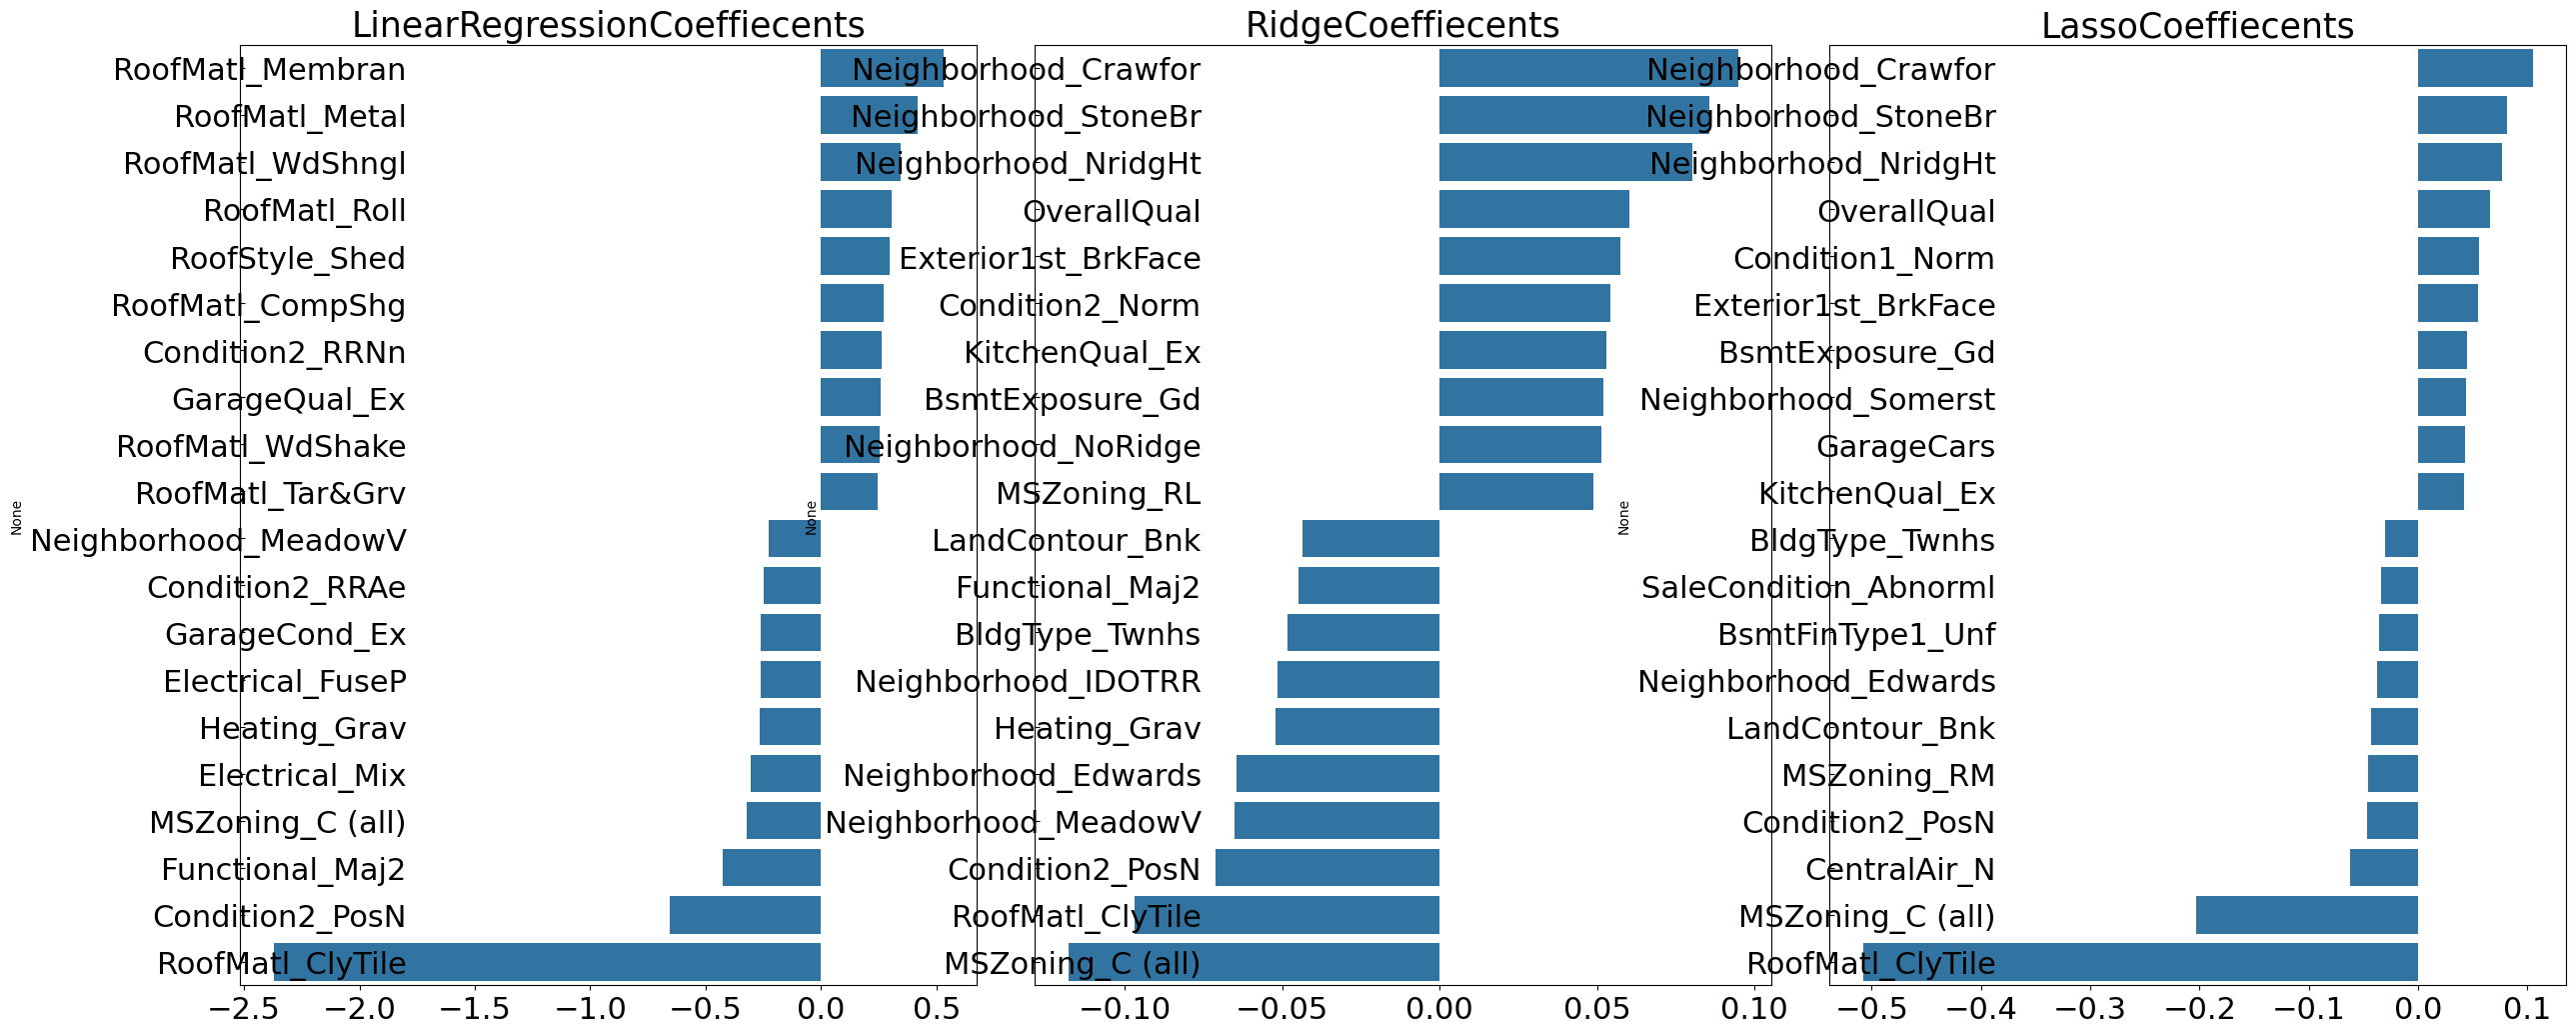

In [153]:
# 앞의 최적화 alpha 값으로 학습 데이터로 학습. 테스트 데이터로 예측 및 평가 수행
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 rmse 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [ ]:
# alpha 값 최적화 후 테스트 데이터 세트의 예측성능이 좋아졌다.
# 릿지와 라쏘 모델에서 비슷한 회귀계수가 높다. 다만 라쏘 모델의 경우 릿지에 비해 동일한 피처라도 회귀 계수의 값이 상당히 작다.

In [ ]:
# 데이터 세트를 추가적으로 가공해서 모델 튜닝을 좀더 해보자
# 첫번째는 피처 데이터 세트의 데이터 분포도이고
# 두 번째는 이상치 데이터 처리이다.

In [ ]:
# 모든 숫자형 피처의 데이터 분포도를 확인해 분포도가 어느 정도로 왜곡됬는지 알아보자.
# 사이파이 stats 모듈의 skew()함수를 이용해 칼럼의 데이터 세트의 왜곡된 정도를 쉽게 추출할 수 있다.
# 일반적으로 skew()함수의 반환 값이 1이상인 경우를 왜곡 정도가 높다고 판단하지만 상황에 따라 편차가 있다.
# 여기서는 1이상의 값을 반환하는 피처만 추출해 왜곡 정도를 완화하기 위해 로그변환을 적용한다.
# 주의할점은 skew()를 적용하는 숫자형 피처에서 원-핫 인코딩된 카테고리 숫자형 피처는 제외해야한다.
# 카테고리 피처는 코드성 피처이므로 인코딩 시 당연히 왜곡될 가능성이 높다. 따라서 skew()함수를 적용하는 DataFrame은
# 원핫코딩이 적용된 house_df_ohe가 아니라 원-핫 인코딩이 적용되지 않은 house_df이어야 한다.

In [154]:
from scipy.stats import skew

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출
features_index = house_df.dtypes[house_df.dtypes !='object'].index
# house_df에 칼럼 index를 []로 입력하면 해당하는 칼럼 데이터 세트 변환. apply lambda로 skew() 호출
skew_features = house_df[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [58]:
# 추출된 왜곡 정도가 높은 피처를 로그변환한다.
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [155]:
# house_df의 피처를 일부 로그변환 했으므로 다시 원-핫 인코딩을 적용한 house_df_ohe를 만든다.
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop(['SalePrice'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 피처를 로그변환한 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 rmse 값:0.1418, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 rmse 값:0.142, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE :  0.132
Ridge 로그 변환된 RMSE :  0.124
Lasso 로그 변환된 RMSE :  0.12


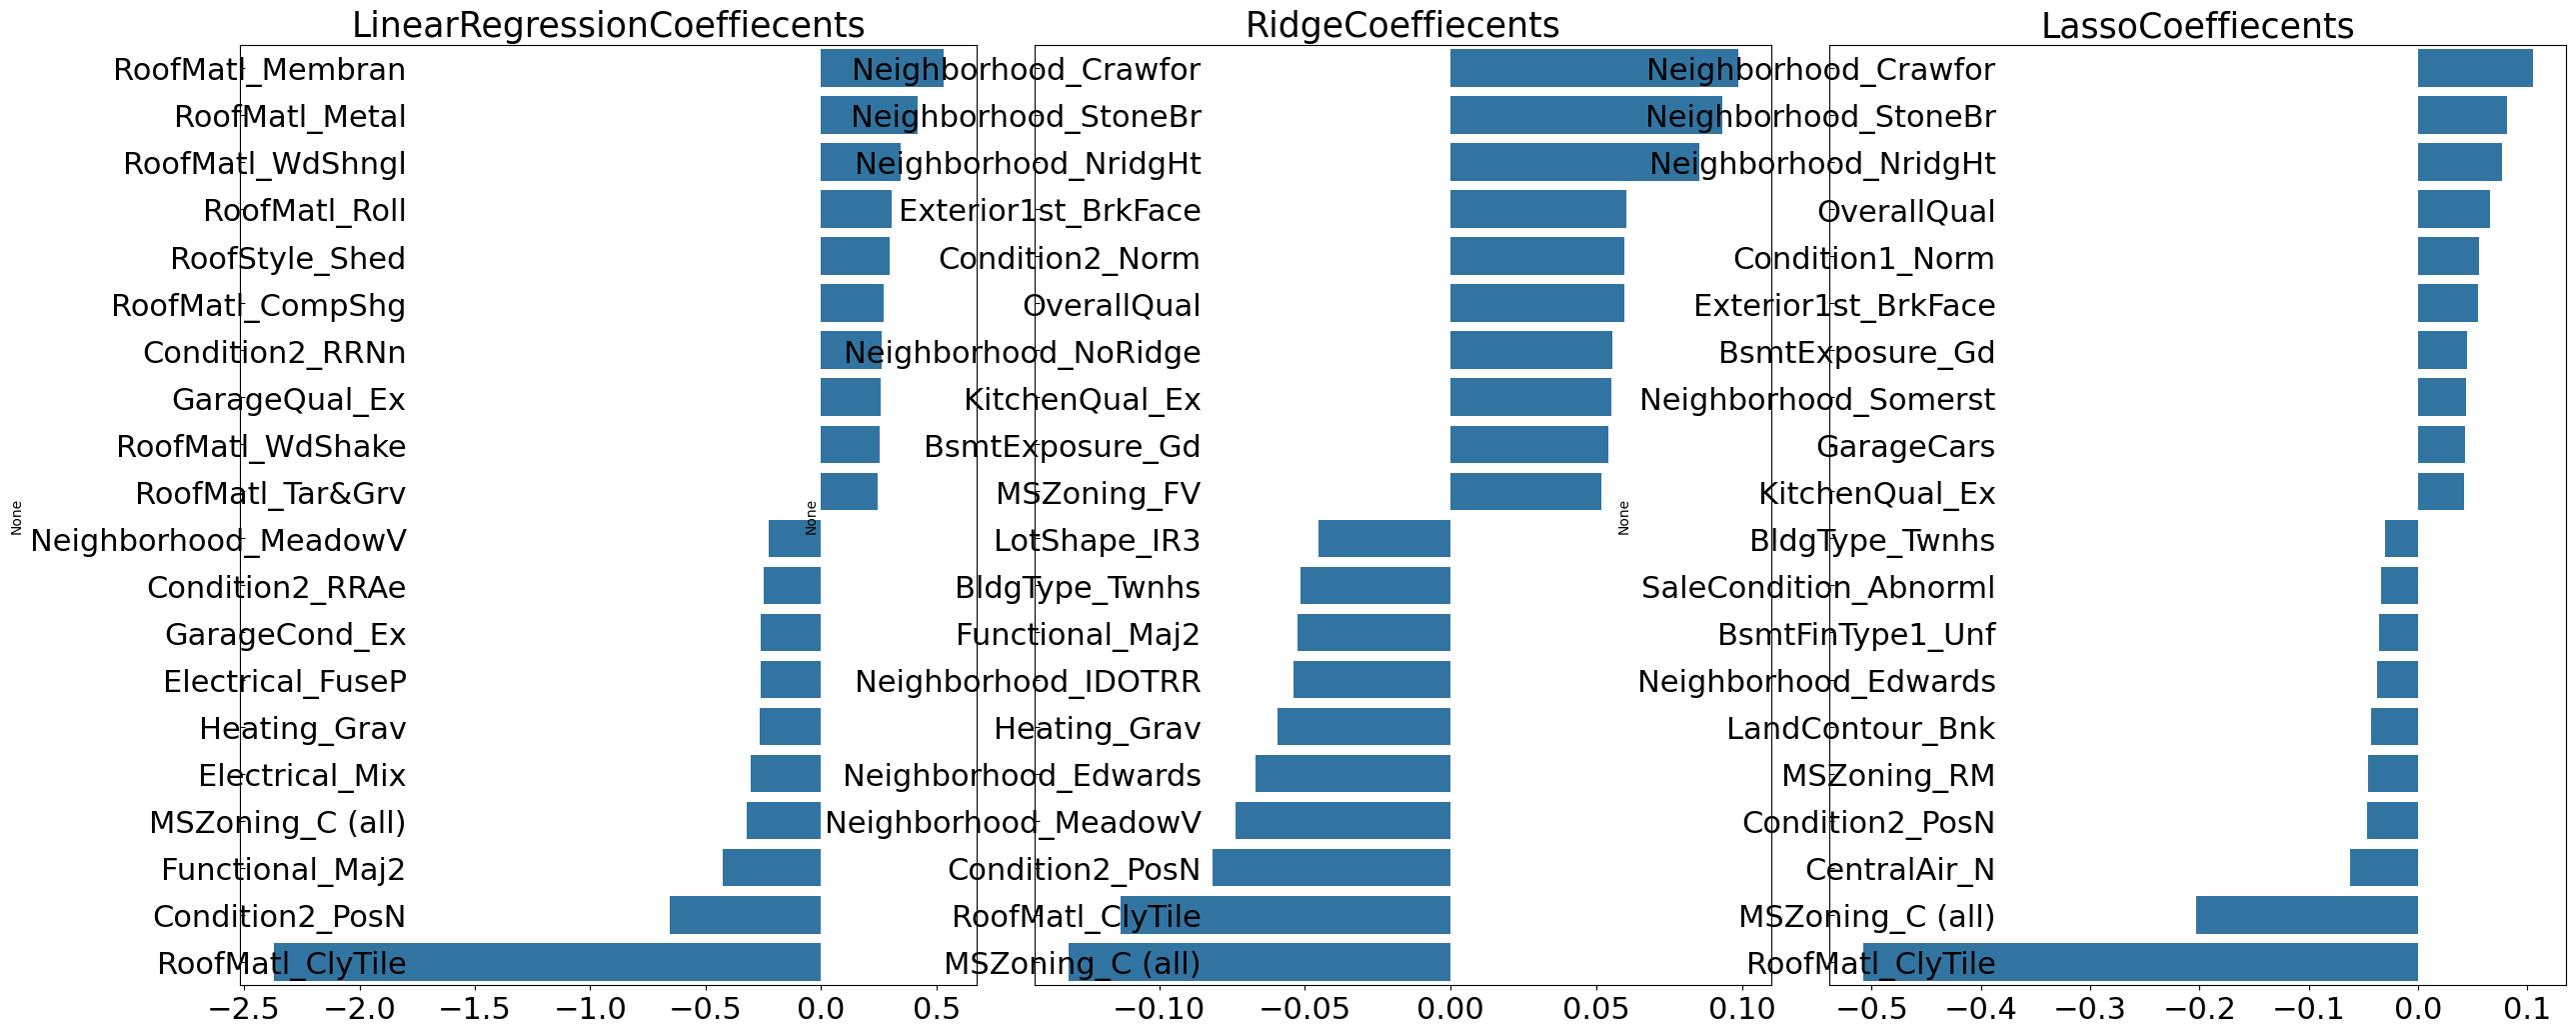

In [156]:
# 앞의 최적화 alpha 값으로 학습 데이터로 학습. 테스트 데이터로 예측 및 평가 수행
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 rmse 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

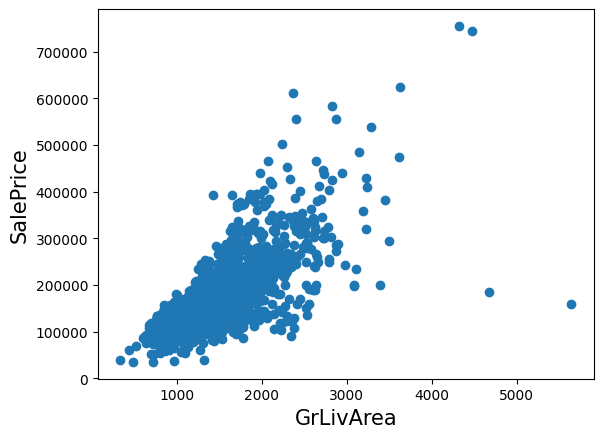

In [64]:
# 두번째는 주택가격데이터가 변환되기 이전의 원본 데이터 세트은 house_df_org에서 GrLivArea와 타깃 값인
# SalePrice의 관계를 시각화해본다.
plt.scatter(x=house_df_org['GrLivArea'], y=house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [ ]:
# 일반적으로 주거 공간이 큰 집일수록 가격이 비싸기 때문에 GrLivArea 피처는 SalePrice와 양의 상관관계를 가지고 있음을
# 직관적으로 알 수있다.
# 2개의 이상치 데이터가 있다. -> 삭제

In [65]:
# GrLivArea와 SalePrice 모두 로그 변환됐으므로 이를 반영한 조건 생성.
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('이상치 레코드 index :', outlier_index.values)
print('이상치 삭제 전 house_df_ohe shape :', house_df_ohe.shape)

# DataFrame의 인덱스를 이용해 이상치 레코드 삭제.
house_df_ohe.drop(outlier_index, axis=0, inplace=True)
print('이상치 삭제 후 house_df_ohe shape :', house_df_ohe.shape)

이상치 레코드 index : [ 523 1298]
이상치 삭제 전 house_df_ohe shape : (1460, 270)
이상치 삭제 후 house_df_ohe shape : (1458, 270)


In [67]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop(['SalePrice'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 rmse 값:0.1125, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 rmse 값:0.1122, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE :  0.129
Ridge 로그 변환된 RMSE :  0.103
Lasso 로그 변환된 RMSE :  0.1


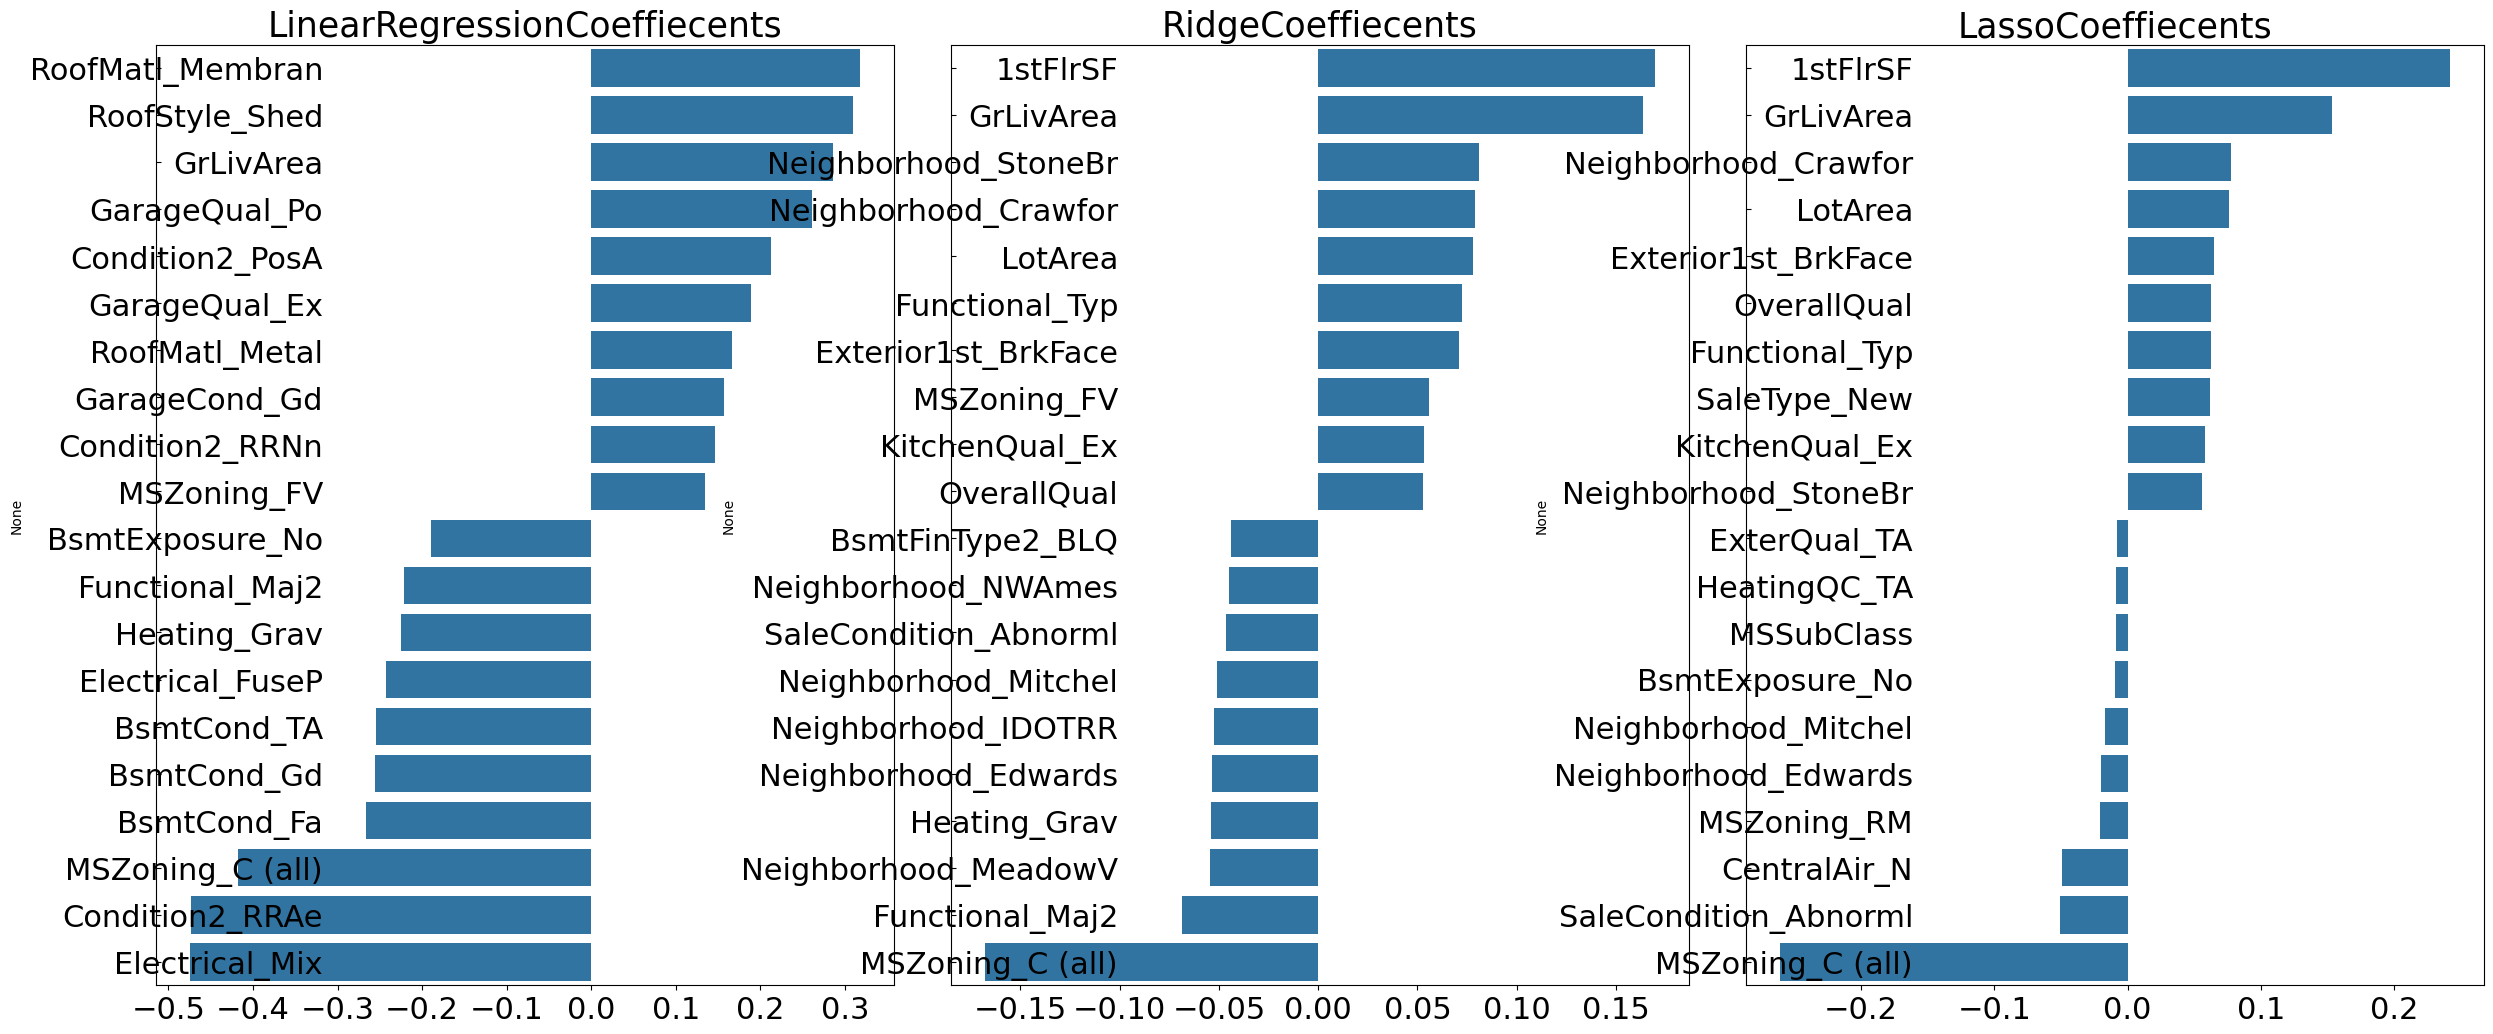

In [68]:
# 앞의 최적화 alpha 값으로 학습 데이터로 학습. 테스트 데이터로 예측 및 평가 수행
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 rmse 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [ ]:
# 머신러닝 알고리즘을 적용하기 이전에 완벽하게 데이터의 선처리 작업을 수행하라는 의미는 아니다. 일단
# 대략의 데이터 가공과 모델 최적화를 수행한 뒤 다시 이에 기반한 여러가지 기법의 데이터 가공과 하이퍼 파라미터 기반의 모델
# 최적화를 반복적으로 수행하는 것이 바람직한 머신러닝 모델 생성 과정이다.

### 회귀 트리 모델 학습/예측/평가

In [69]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 rmse 값:0.1206, 최적 alpha:{'n_estimators': 1000}


In [70]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
print_best_params(lgbm_reg, lgbm_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.330213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3155
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 171
[LightGBM] [Info] Start training from score 12.021352
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3167
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 168
[LightGBM] [Info] Start training from score 12.023516
[LightGBM] [Warning] Found

### 회귀 모델의 예측 결과 혼합을 통한 최종 예측

In [71]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE : {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델의 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합' : pred, '릿지' : ridge_pred, '라쏘' : lasso_pred}

# 최종 혼합 모델, 개별 모델의 rmse 값 출력
get_rmse_pred(preds)



최종 혼합 모델의 RMSE : 0.10006075517615193
릿지 모델의 RMSE : 0.10340697165289348
라쏘 모델의 RMSE : 0.10024171179335342


In [72]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합' : pred, 'XGBoost' : xgb_pred, 'LightGBM' : lgbm_pred}

get_rmse_pred(preds)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3174
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 172
[LightGBM] [Info] Start training from score 12.025343
최종 혼합 모델의 RMSE : 0.10215383402419025
XGBoost 모델의 RMSE : 0.10761344291735733
LightGBM 모델의 RMSE : 0.10363891833477148


### 스태킹 앙상블 모델을 통한 회귀 예측

In [ ]:
# 스태킹 모델의 핵심은 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와
# 테스트용 피처 데이터 세트를 만드는 것이다.

In [75]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_splits 값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    # 추후에 메타 모델이 사용할 학습 데이터 변환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros(((X_test_n.shape[0], n_folds)))
    print(model.__class__.__name__,'model 시작')

    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트 : ', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        # 폴드 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 데이터를 예측한 데이터를 평균하여 테스트 데이터로 저장
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [76]:
# get_stacking_base_datasets()는 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환.
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base) 모델이 생성한 학습용/테스트용 데이터 반환
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge model 시작
	 폴드 세트 :  0 시작
	 폴드 세트 :  1 시작
	 폴드 세트 :  2 시작
	 폴드 세트 :  3 시작
	 폴드 세트 :  4 시작
Lasso model 시작
	 폴드 세트 :  0 시작
	 폴드 세트 :  1 시작
	 폴드 세트 :  2 시작
	 폴드 세트 :  3 시작
	 폴드 세트 :  4 시작
XGBRegressor model 시작
	 폴드 세트 :  0 시작
	 폴드 세트 :  1 시작
	 폴드 세트 :  2 시작
	 폴드 세트 :  3 시작
	 폴드 세트 :  4 시작
LGBMRegressor model 시작
	 폴드 세트 :  0 시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2924
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 156
[LightGBM] [Info] Start training from score 12.035561
	 폴드 세트 :  1 시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Tot

In [79]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 스태킹 형태로 결합.
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용
meta_model_lasso = Lasso(alpha=0.0005)

# 개별 모델 예측값을 기반으로 새롭게 만들어진 학습/테스트 데이터로 메타 모델 예측 및 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은 : ', rmse)



스태킹 회귀 모델의 최종 RMSE 값은 :  0.09704503149148055
